In [1]:
import scipy
import numpy
from scipy.integrate import quad
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

# General Relativity

## Distances and the Metric

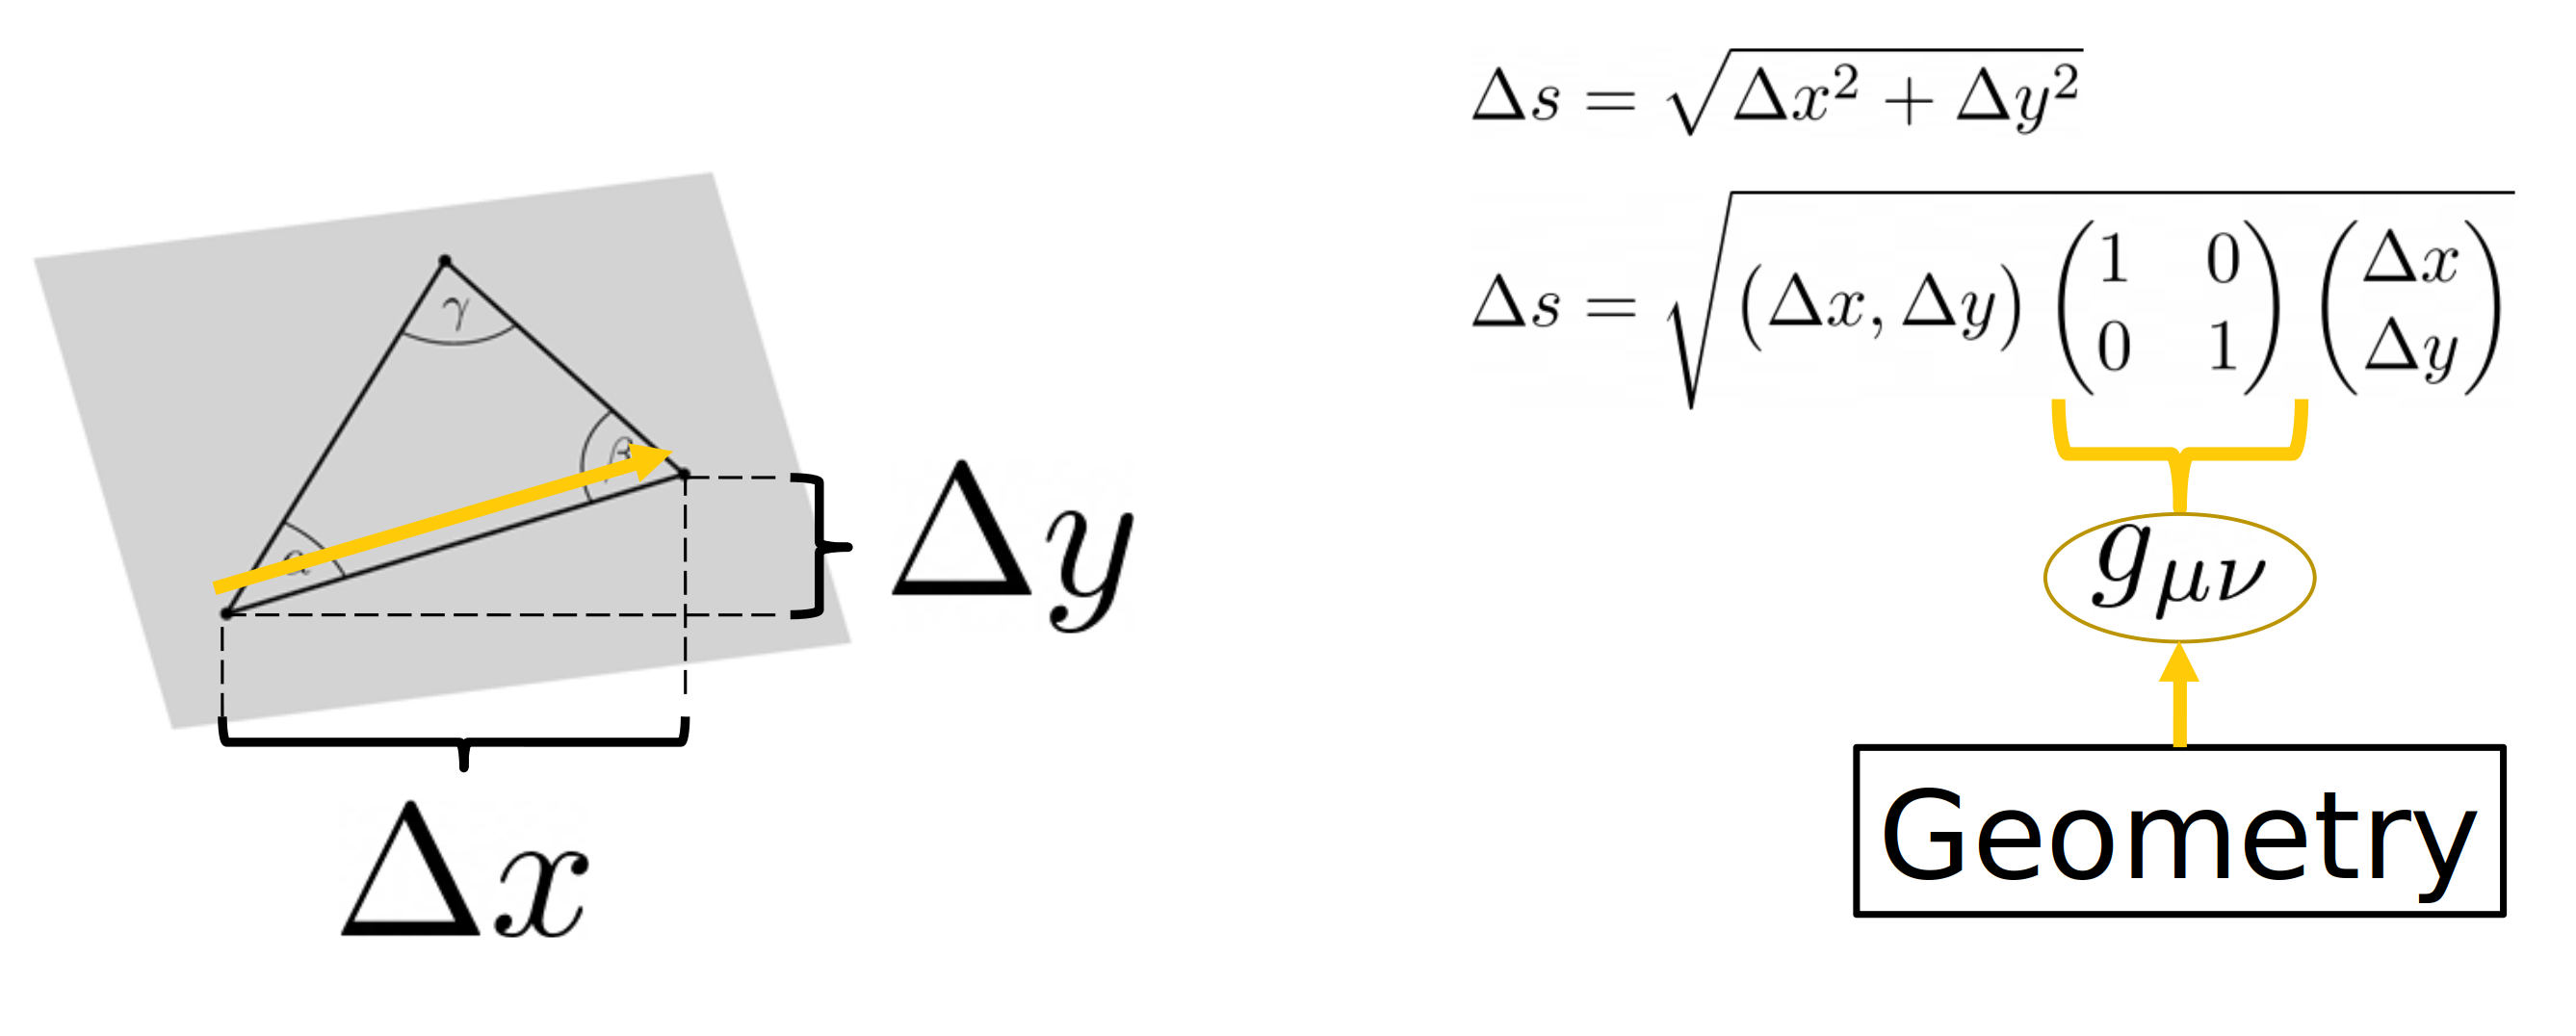

Geometry is understood in terms of curvature. One of the ways of understanding geometry is studying **geodesics** (lines of shortest distance). The value of the metric depends on where you are in the space time. The geometry is encoded through a **tensor** called **metric**.

## Example Metrics

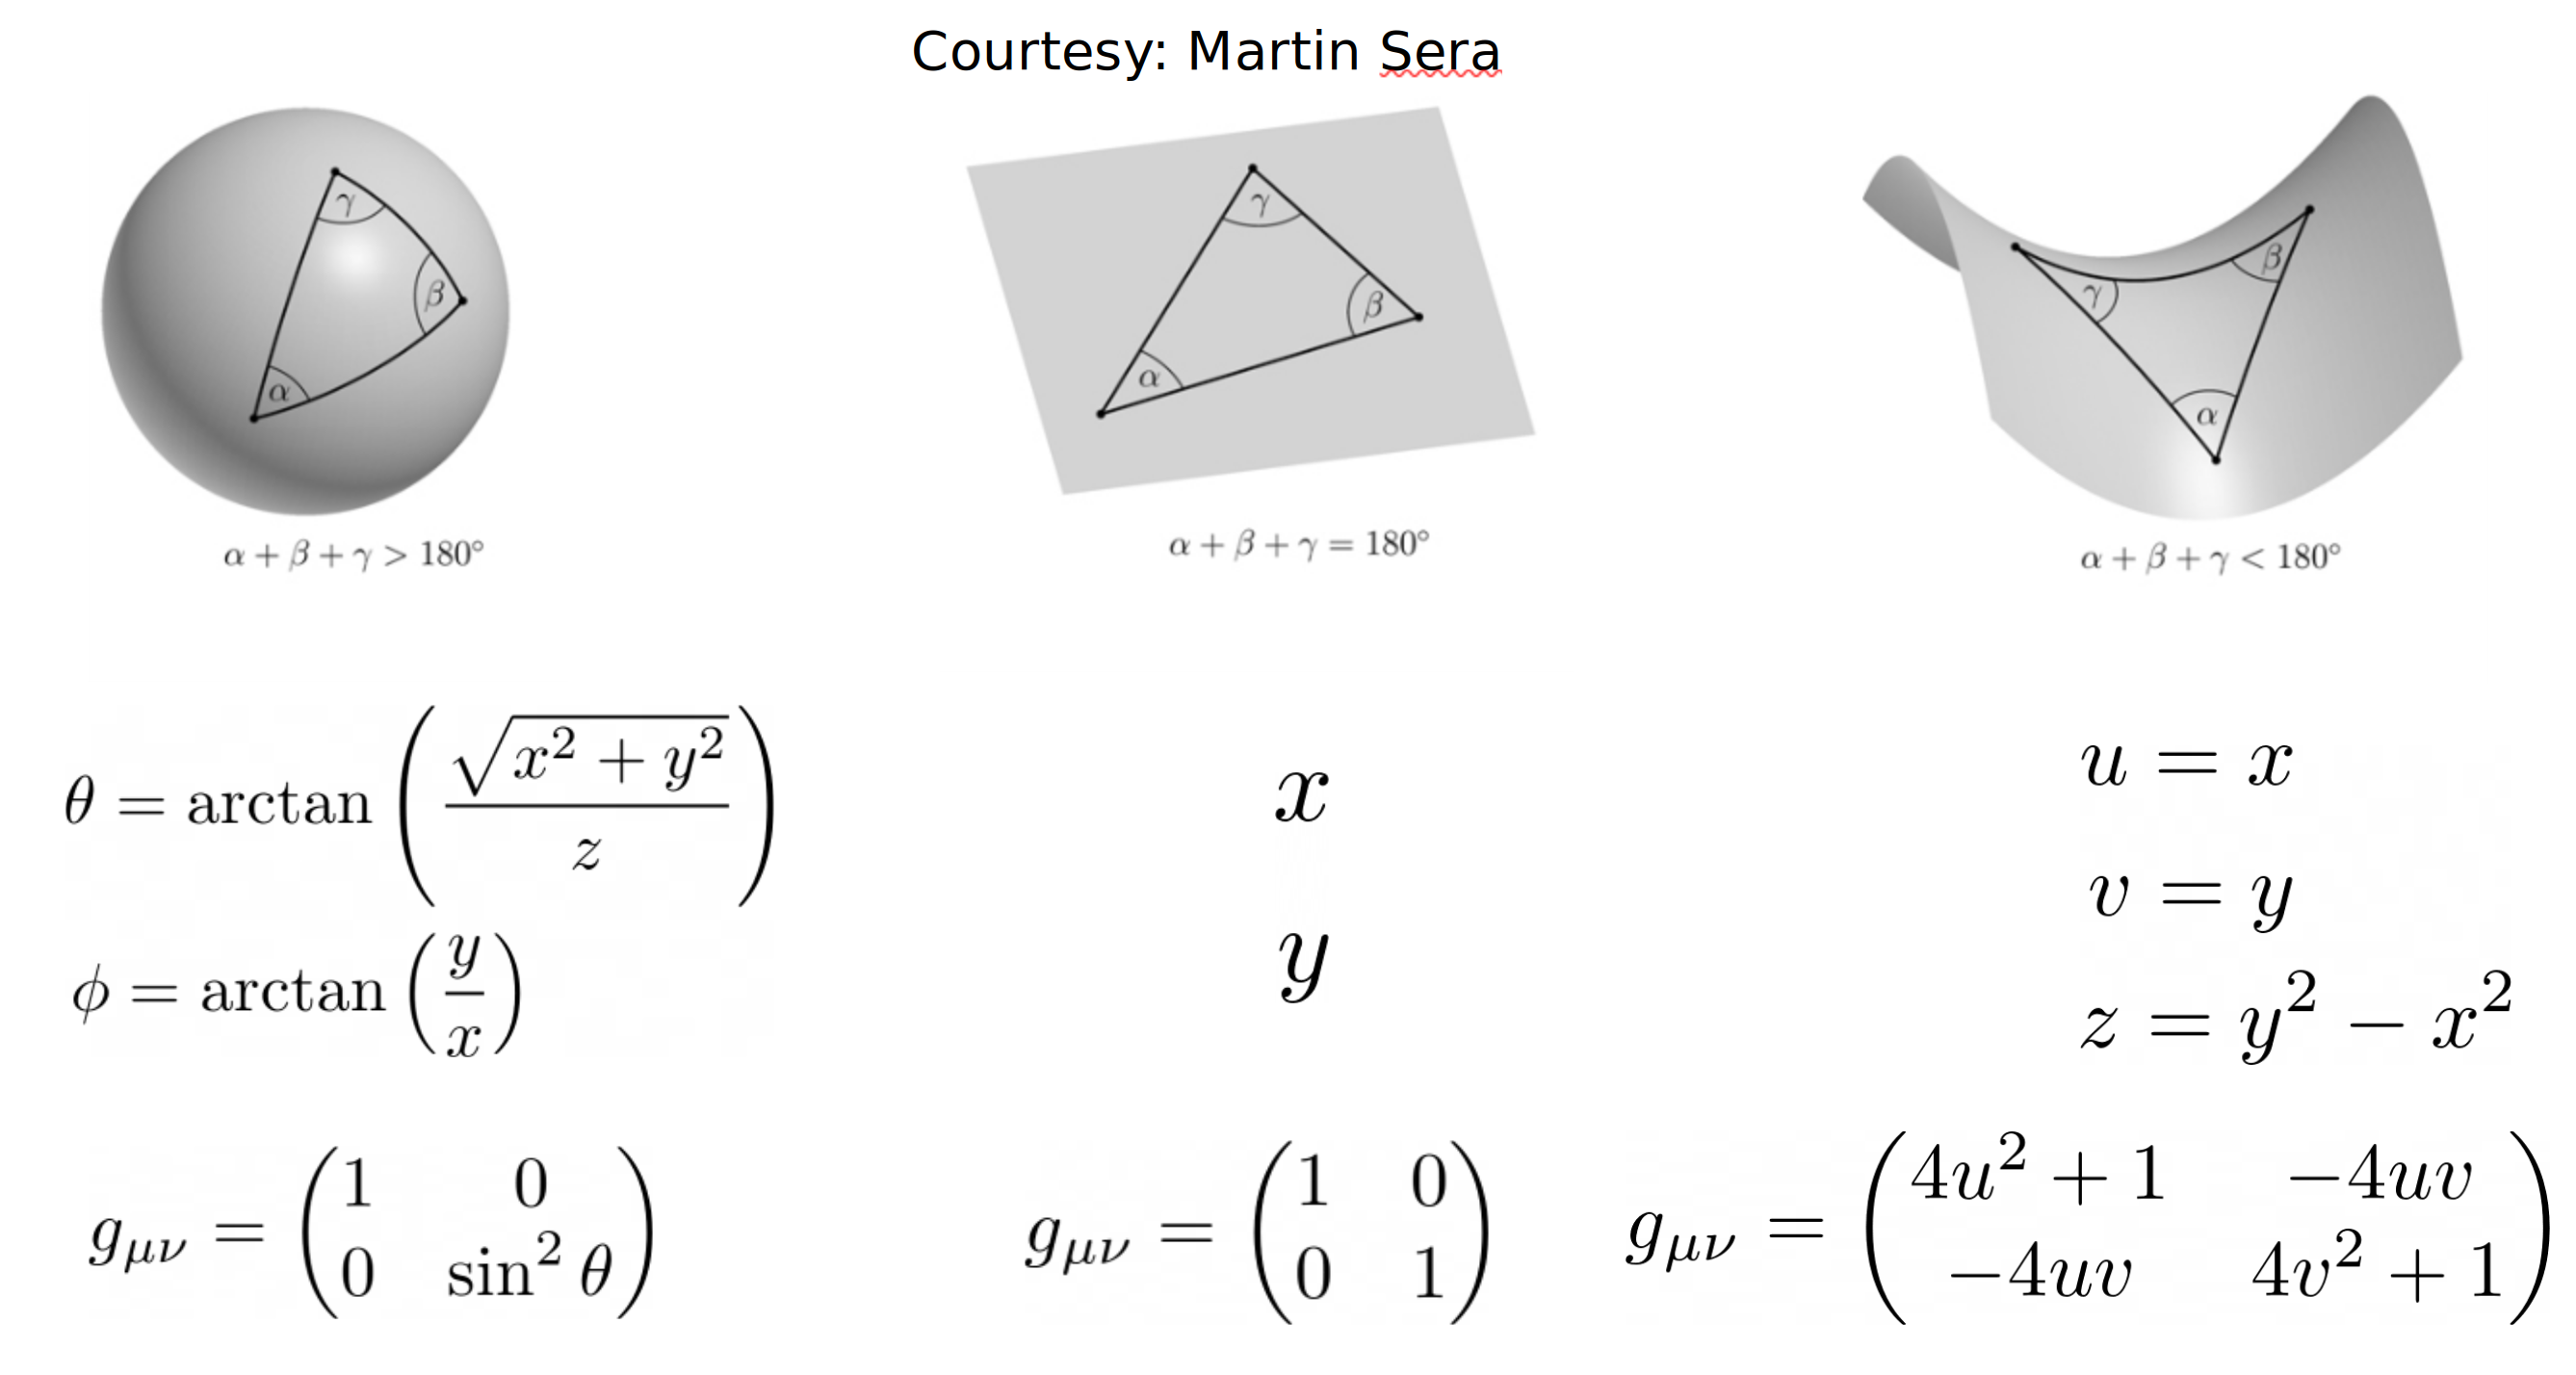

You can caclculate lengths by integraring differential length elements

$\int ds=\int\sqrt{\vec dx\cdot \vec dx}=\int \sqrt{g_{\mu\nu}dx^\mu dx^\nu}$.

Let's check to see if this length formula makes sense by calculating the length of a curve on the equator of a unit sphere.

In [2]:
def gSphereDD(theta):
  return np.array(
      [
       [1, 0],
       [0, np.sin(theta)**2]
      ]
  )

dphi = np.array([0,1])
theta = np.pi/2
delta_phi = 2*np.pi

## Find the length of a line of latitude on a unit sphere located at theta 
## Quad returns a tuple whose first element is the calculated answer and the second element is the error
print("Here is the answer with the geodesic equation :{}\n".format(quad(lambda phi : np.sqrt(np.dot(dphi, np.dot(gSphereDD(theta), dphi))), 0, delta_phi)[0]))

## Using the formula delta_phi*r
print("Here is the answer using the standard formula :{}".format(np.sin(theta)*delta_phi))

Here is the answer with the geodesic equation :6.283185307179586

Here is the answer using the standard formula :6.283185307179586


Here are some example 2D geometries and their corresponding metrics

## Schwarzschild

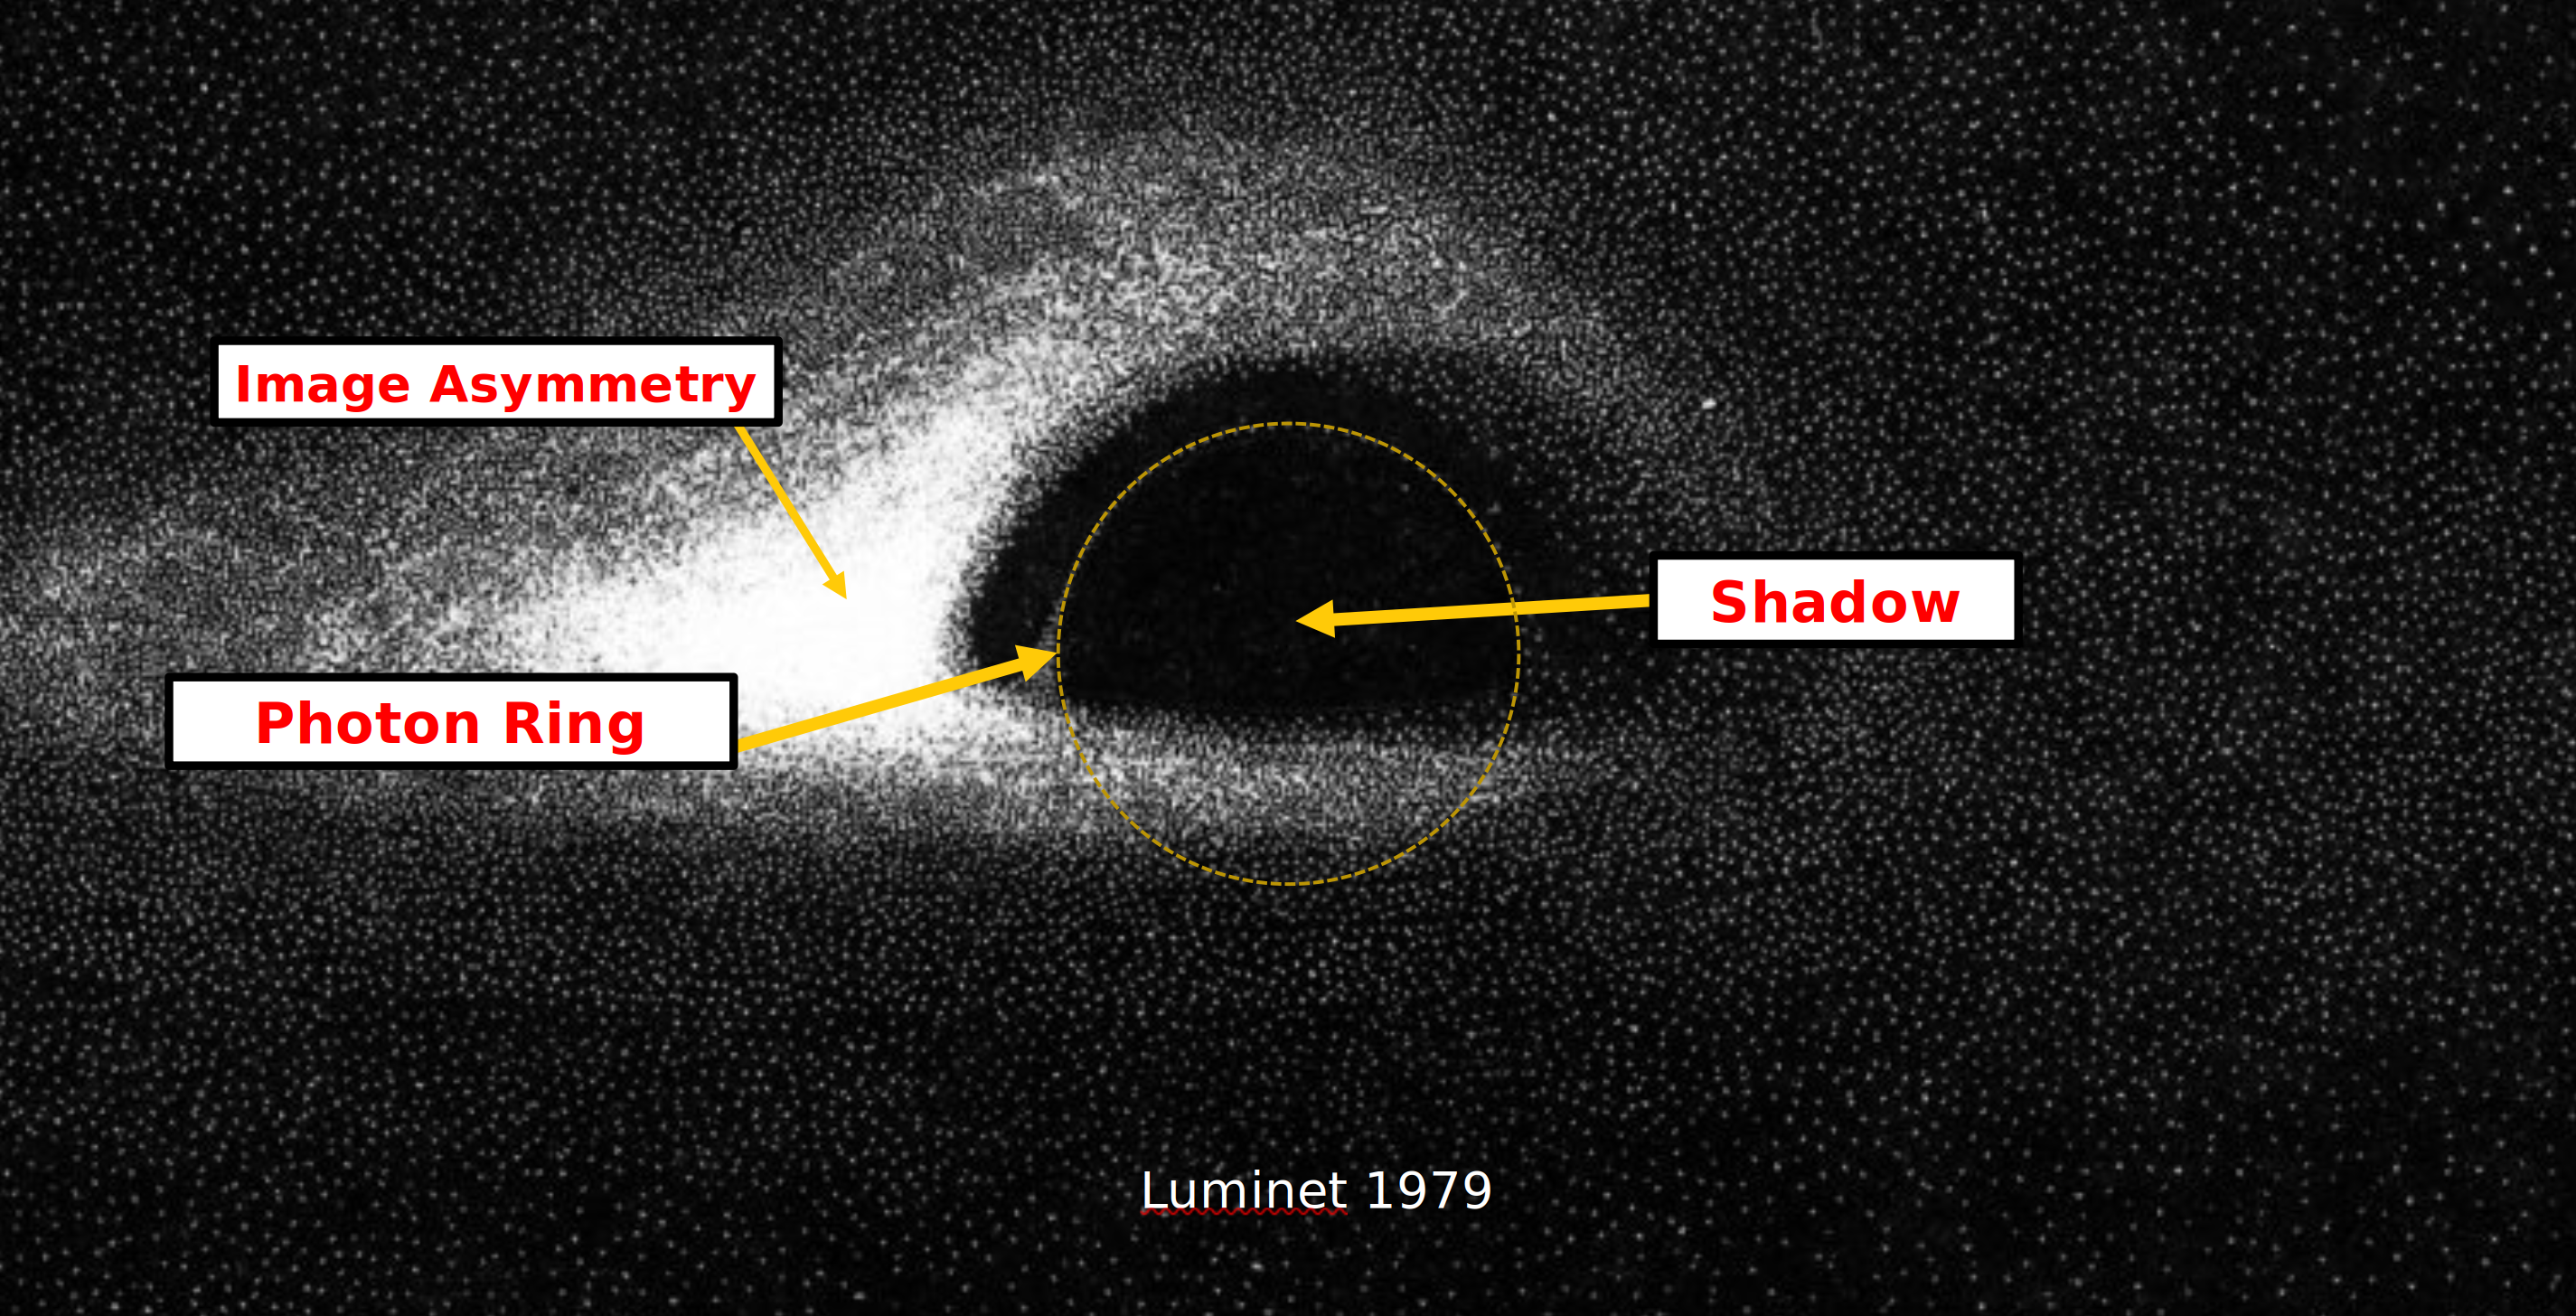

Here is a metric for a **Schwarzschild Spacetime** in **Spherical Polar Coordinates**. We can `label' locations in the spacetime with a **coordinate atlas**. 


$g_{\mu\nu}=
\begin{pmatrix}
  -\left(1-\frac{r_s}{r}\right) & 0 & 0 & 0\\
  0 & \frac{1}{\left(1-\frac{r_s}{r}\right)} & 0 & 0\\
  0 & 0 & r^2 & 0\\
  0 & 0 & 0 & r^2\sin^2\theta
\end{pmatrix}
$

* The **Event Horizon** is located at **$r_s=2\frac{GM}{c^2}$**

* **Spherical Polar Coordinates (Schwarzschild Coordinates, Boyer-Lindquist Coordinates)**: $(t,r,\theta,\phi)$




The metric is a **symmetric covariant tensor**, often labeled as a $(0,2)$ tensor. Tensors can either have upper indices, like $T^{\mu}$ or lower indices, like $T_\mu$, or even both, like $\delta^\mu{}_\nu$. The metric tensor has 2 lower indices.

The indices are variables that can take on any number from $0$ to $d$ where $d+1$ is the **dimension** of the geometry. Since we live in a $3$ spatial and $1$ time dimentional world, $d=3$. The $0$th index is usually reserved for time. 

We normally represent tensors with 2 indices such that the first index labels the row, and the second index labels the column.

The metric tensor is a function of coordinates, you can evaluate it at different locations to see what it's output is like.

In [3]:
def gDD(r, theta):
  return np.array(
      [
       [-(1-2/r), 0, 0, 0],
       [0, 1/(1-2/r), 0, 0],
       [0, 0, r**2, 0],
       [0, 0, 0, r**2*np.sin(theta)]
      ]
  )
gDD(3, np.pi)

array([[-3.33333333e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  9.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.10218212e-15]])

If $\mu=0$ and $\nu=0$, then what is $g_{\mu\nu}$ at $r=3$ and $\theta=\pi$?

In [4]:
gDD(3,np.pi)[0,0]

-0.33333333333333337

The **inverse metric**, $g^{\mu\nu}$ is defined with upper indices to satisfy:

$g^{\mu\alpha}g_{\alpha\nu}=\delta^\mu{}_\nu=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}$

We have used **Einstein summation convention** to **contract indices** on these metrics. 

<font color='red' font-weight='bold'>
Indices can only be contracted in pairs with one lower and one upper index
</font>

You can check below that the inverse metric always multiplies the ordinary metric to give 1.

In [5]:
def gUU(r, theta):
  return np.array(
      [
       [-1/(1-2/r), 0, 0, 0],
       [0, (1-2/r), 0, 0],
       [0, 0, 1/r**2, 0],
       [0, 0, 0, 1/(r**2*np.sin(theta))]
      ]
  )
r = 3
theta = 50* np.pi/90 
gDD(r, theta) @ gUU(r, theta)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

You may notice that the $\delta^\mu{}_\nu$ has one lower and one upper index. That's because the metric is used to *raise and lower indices*.

# Ray Tracing

## Geodesics

**Geodesics** are the curves of shortest distance. Physical trajectories are geodesics.

We want to represent geodesics with math. Because they are 1D, we can **parameterize** points on a geodesics with a real number. We usually parameterize geodesics with **proper time** $\tau$, but other things can be used. 

1D curves in a given geometry can be thought of an **embedding** of the real line in said geometry. If we label our parameter with the variable $\tau$, then we can represent a curve, $\gamma$ with:

$
\gamma(\tau) = (t(\tau), r(\tau), \theta(\tau),\phi(\tau))
$


We will parameterize our Schwarzschild geodesics first with the radius *r* and then with and abstract parameter $\xi$.

$
\gamma(r) = (t(r), r, \theta(r),\phi(r))
$

We usually define the four **velocity** for particles via 

$
u = \frac{d\gamma}{d \tau} = \frac{\partial\gamma}{\partial x^\mu}\frac{d x^\mu}{d\tau}
$

In terms of components, you will often see

$
u^\mu =\dot x^\mu =\frac{d x^\mu}{d\tau}=\left( \dot t, \dot r, \dot \theta, \dot \phi\right)^\mu
 $

In python, this looks like 


```
x[mu] = {t_dot, r_dot, theta_dot, phi_dot}[mu]
```



Vectors are a type of tensor. The magnitude of a vector can be found by lower it's index with the metric, and then contracting indices.

$|u|^2=|\dot x|^2=\dot x_\mu \dot x^\mu = g_{\mu\nu} \dot x^{\mu} \dot x^\nu$

Because of the symmetry of the space time, we can define a conserved $\phi$ angular momentum **L** conserved total angular momentum **C** (Carter's Constant),  and a conserved energy **E**.

The conserved energy and $phi$ angular momenta in particular is given by:

$E=\dot x\cdot \xi_t = \frac{r-2}{2}\;\dot t$

$L=\dot x\cdot \xi_\phi = r^2\sin^2\theta\;\dot \phi$

where

$\xi^\mu_t = (1,0,0,0)$

$\xi^\mu_\phi = (0,0,0,1)$

The $\xi$'s are called **Killing vectors**. These are related to **time translational symmetry** and **$\phi$** translational symmetry.

Killing vectors can be used to find conserve quantities for geodesics using a special property:

$u\cdot \xi = u^\mu g_{\mu\nu}\xi^\nu = k$

where $k$ is a constant.

Once we have these conserved quantities, we can quickly out a formula by **quadrature** for a geodesic in Schwarzschild. 

Consider a **null** geodesic that lies in the $\theta=\frac{\pi}{2}$ plane,

$
u^2 = |u|^2 = \frac{r-2}{r}\dot t^2 + \frac{r}{r-2}\dot r^2 + r^2 \dot \phi^2 = 0
$

$
\implies \frac{E^2}{L^2} + \frac{1}{r^4}\frac{\dot r^2}{\dot \phi^2} + \frac{r-2}{r^3} = 0
$

Define the **impact parameter $b=\frac{L}{E}$ as the impact parameter to get:

$
\frac{\dot \phi}{\dot r} = \frac{d\phi}{d r} = \frac{b}{\sqrt{r^4-b^2(r^2-2r)}}
$

$
\implies \Delta\phi = \int_{r_s}^{r_o}dr\frac{b}{\sqrt{r^4-b^2(r^2-2r)}}
$

Let's implement this in code:

In [6]:
def radial_potential(r, b):
  return r**4 - b**2*r**2 + 2*b**2*r


def minrs(b):
  temp = np.cbrt(b**2)*((-1 + np.sqrt(1+0j-b**2/27))**(1/3)+(-1 - np.sqrt(1+0j-b**2/27))**(1/3))
  return np.real(temp).real if np.imag(temp) < 1e-10 else 0


def d_phi_dr(r, b):
  return b / np.sqrt(radial_potential(r, b))


def phi(rs, b):
  return quad(d_phi_dr, rs, np.inf, args=(b))

We can now draw geodesics given an impact parameter **b**.

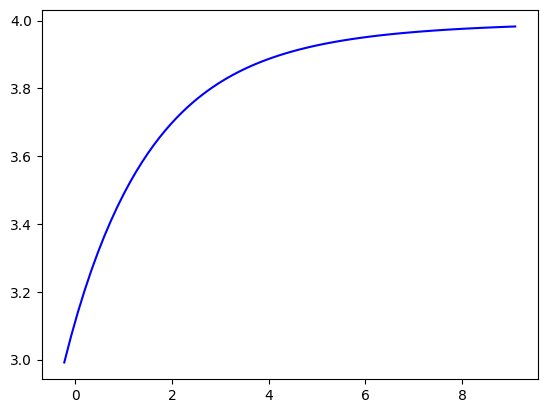

In [7]:
b = 4
steps = 100
rs = 3
rmax = 10
coords = [[step*(rmax-rs)/steps+rs, phi(step*(rmax-rs)/steps+rs, b)[0]] for step in range(0,steps)]
x_vals = list(map(lambda x: x[0]*np.cos(x[1]),coords))
y_vals = list(map(lambda x: x[0]*np.sin(x[1]),coords))
plt.plot(x_vals, y_vals, 'b')

plt.show()

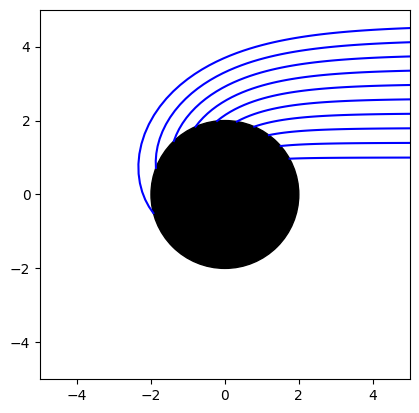

In [8]:
def gen_points(rs, rmax, b, steps):
  coords = [[step*(rmax-rs)/steps+rs, phi(step*(rmax-rs)/steps + rs, b)[0]] for step in range(steps)]
  x_vals = list(map(lambda x: x[0]*numpy.cos(x[1]),coords))
  y_vals = list(map(lambda x: x[0]*numpy.sin(x[1]),coords))
  return x_vals, y_vals
  
bfinal = 5
binit = 1
ncurves = 10
for i in range(ncurves):
  plt.plot(*gen_points(2, 10, i*(bfinal-binit)/ncurves + binit, 100), 'b')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
ax = plt.gca()
ax.set_aspect(1)
ax.add_patch(plt.Circle((0, 0), 2, color='k'))
plt.show()

## Photon Ring

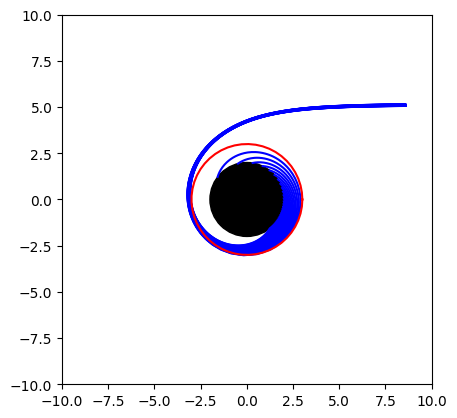

In [9]:
bfinal = 5.196
binit = 5.1
ncurves = 30

for i in range(ncurves):
  plt.plot(*gen_points(2, 10, i*(bfinal-binit)/ncurves + binit, 500), 'b')
plt.xlim([-10, 10])
plt.ylim([-10, 10])

#zip(*matrix) is a oneline way of transposing matrices. Usine numpy.transpose if using numpy arrays
circle_points = zip(*((3*numpy.cos(i*2*numpy.pi/49), 3*numpy.sin(i*2*numpy.pi/49)) for i in range(50)))
plt.plot(*list(circle_points), 'r')
ax = plt.gca()
ax.set_aspect(1)
ax.add_patch(plt.Circle((0, 0), 2, color='k'))
plt.show()

In [10]:

plt.show()

Some geodesics have a radius of closest approach. These appear as a turning point when integrating. We can find the turning point by solving for the roots of the radial potential.

In [11]:
def radial_potential(r, b):
  return r**4 - b**2*r**2 + 2*b**2*r


def minrs(b):
  temp = np.cbrt(b**2)*((-1 + np.sqrt(1+0j-b**2/27))**(1/3)+(-1 - np.sqrt(1+0j-b**2/27))**(1/3))
  return np.real(temp).real if np.imag(temp) < 1e-10 else 0

def d_phi_dx(x, b, rt):
  return -2*b*np.abs(x) / \
    (
        (x**2+rt) * np.sqrt(-((b**2*(-2+x**2+rt)) / (x**2+rt)) + (x**2+rt)**2)
    )

def phi2(xi, b):
  rt = minrs(b)
  if xi.imag != 0:
    return np.inf
  if rt == 0 and xi <0:
    return quad(d_phi_dx, np.inf, 0, args=(b,rt))
  return quad(d_phi_dx, np.inf, xi, args=(b,rt))

def generate_trajectory(ximin, ximax, b, steps):
  rt = minrs(b)
  coords = np.ndarray([steps,2])
  for step in range(steps):
    xi = step*(ximax - ximin)/steps + ximin
    rs = 0 if rt == 0 and xi < 0 else (xi**2 + rt)
    coords[step][0] = rs
    coords[step][1] =  phi2(xi, b)[0]
  x_vals = list(map(lambda x: x[0]*numpy.cos(x[1]),coords))
  y_vals = list(map(lambda x: x[0]*numpy.sin(x[1]),coords))
  return x_vals, y_vals


/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/324942859.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return -2*b*np.abs(x) / \
/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/324942859.py:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(d_phi_dx, np.inf, xi, args=(b,rt))
/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/324942859.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return -2*b*np.abs(x) / \
/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/324942859.py:31: RuntimeWarning: invalid value encountered in cos
  x_vals = list(map(lambda x: x[0]*numpy.cos(x[1]),coords))
/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/324942859.py:32: RuntimeWarning: invalid value encountered in sin
  y_vals = list(map(lambda x: x[0]*numpy.s

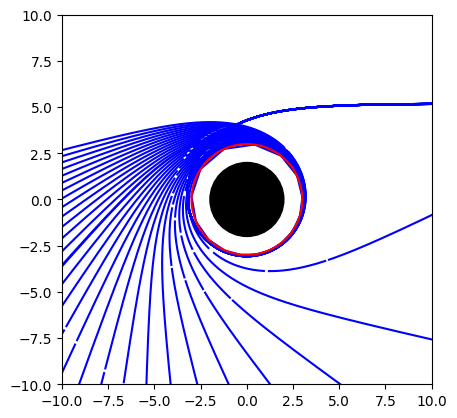

In [12]:
bfinal = np.sqrt(27)*1.001
binit = np.sqrt(27)*1.000001
ncurves = 30

for i in range(ncurves):
  plt.plot(*generate_trajectory(-5, 5, i*(bfinal-binit)/ncurves + binit, 500), 'b')
plt.xlim([-10, 10])
plt.ylim([-10, 10])

#zip(*matrix) is a oneline way of transposing matrices. Usine numpy.transpose if using numpy arrays
circle_points = zip(*((3*numpy.cos(i*2*numpy.pi/49), 3*numpy.sin(i*2*numpy.pi/49)) for i in range(50)))
plt.plot(*list(circle_points), 'r')
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 2, color='k'))
ax.set_aspect(1)
plt.show()

There's a special *red* curve in red which is a closed orbit for photons. This is the **photon shell**

The photon shell is located at:

$
r_{\text{photon shell}} = 3
$

# Imaging a Blackhole

Image coordinates are traditionally done in terms of **Bardeen** coordinates which depends on the **momenta** of the **photon**.

There are three conserved quantities associated with a photon trajectory.

1. The angular momentum in the phi direction L

2. The total momentum C

3. The energy E

We can define momentum as:

$
p_\mu = g_{\mu\nu}\dot x(\tau)^\nu
$

The image is then determined by the direction the photon is travelling when it hits your eye

$
 \alpha = x = \frac{|p^\phi|}{|p^r|}=-\frac{1}{\sin\theta}\frac{L}{E}
$

$
 \beta = y = \frac{|p^\theta|}{|p^r|}=\frac{1}{E}\sqrt{C-L^2\cot^2\theta}
$

We can also define a set of screen polar coordinates with radius $b$ and angle $\varphi$

$
b = \sqrt{\alpha^2 + \beta^2}
$

$
\varphi = \arctan\left(\frac{y}{x}\right) = \arctan\left(\frac{\beta}{\alpha}\right)
$

## What we will draw

Draw the emission from a plane centered on the origin. Some rays of light pass through the plane once, **n=0**, some twice **n=1**, and some more **n>=2**. Rays that fall into the blackhole are associated with the blackhole **shadow**. The boundary between where rays fall into the blackhole and where rays can escape the blackhole is called the **critical curve**.

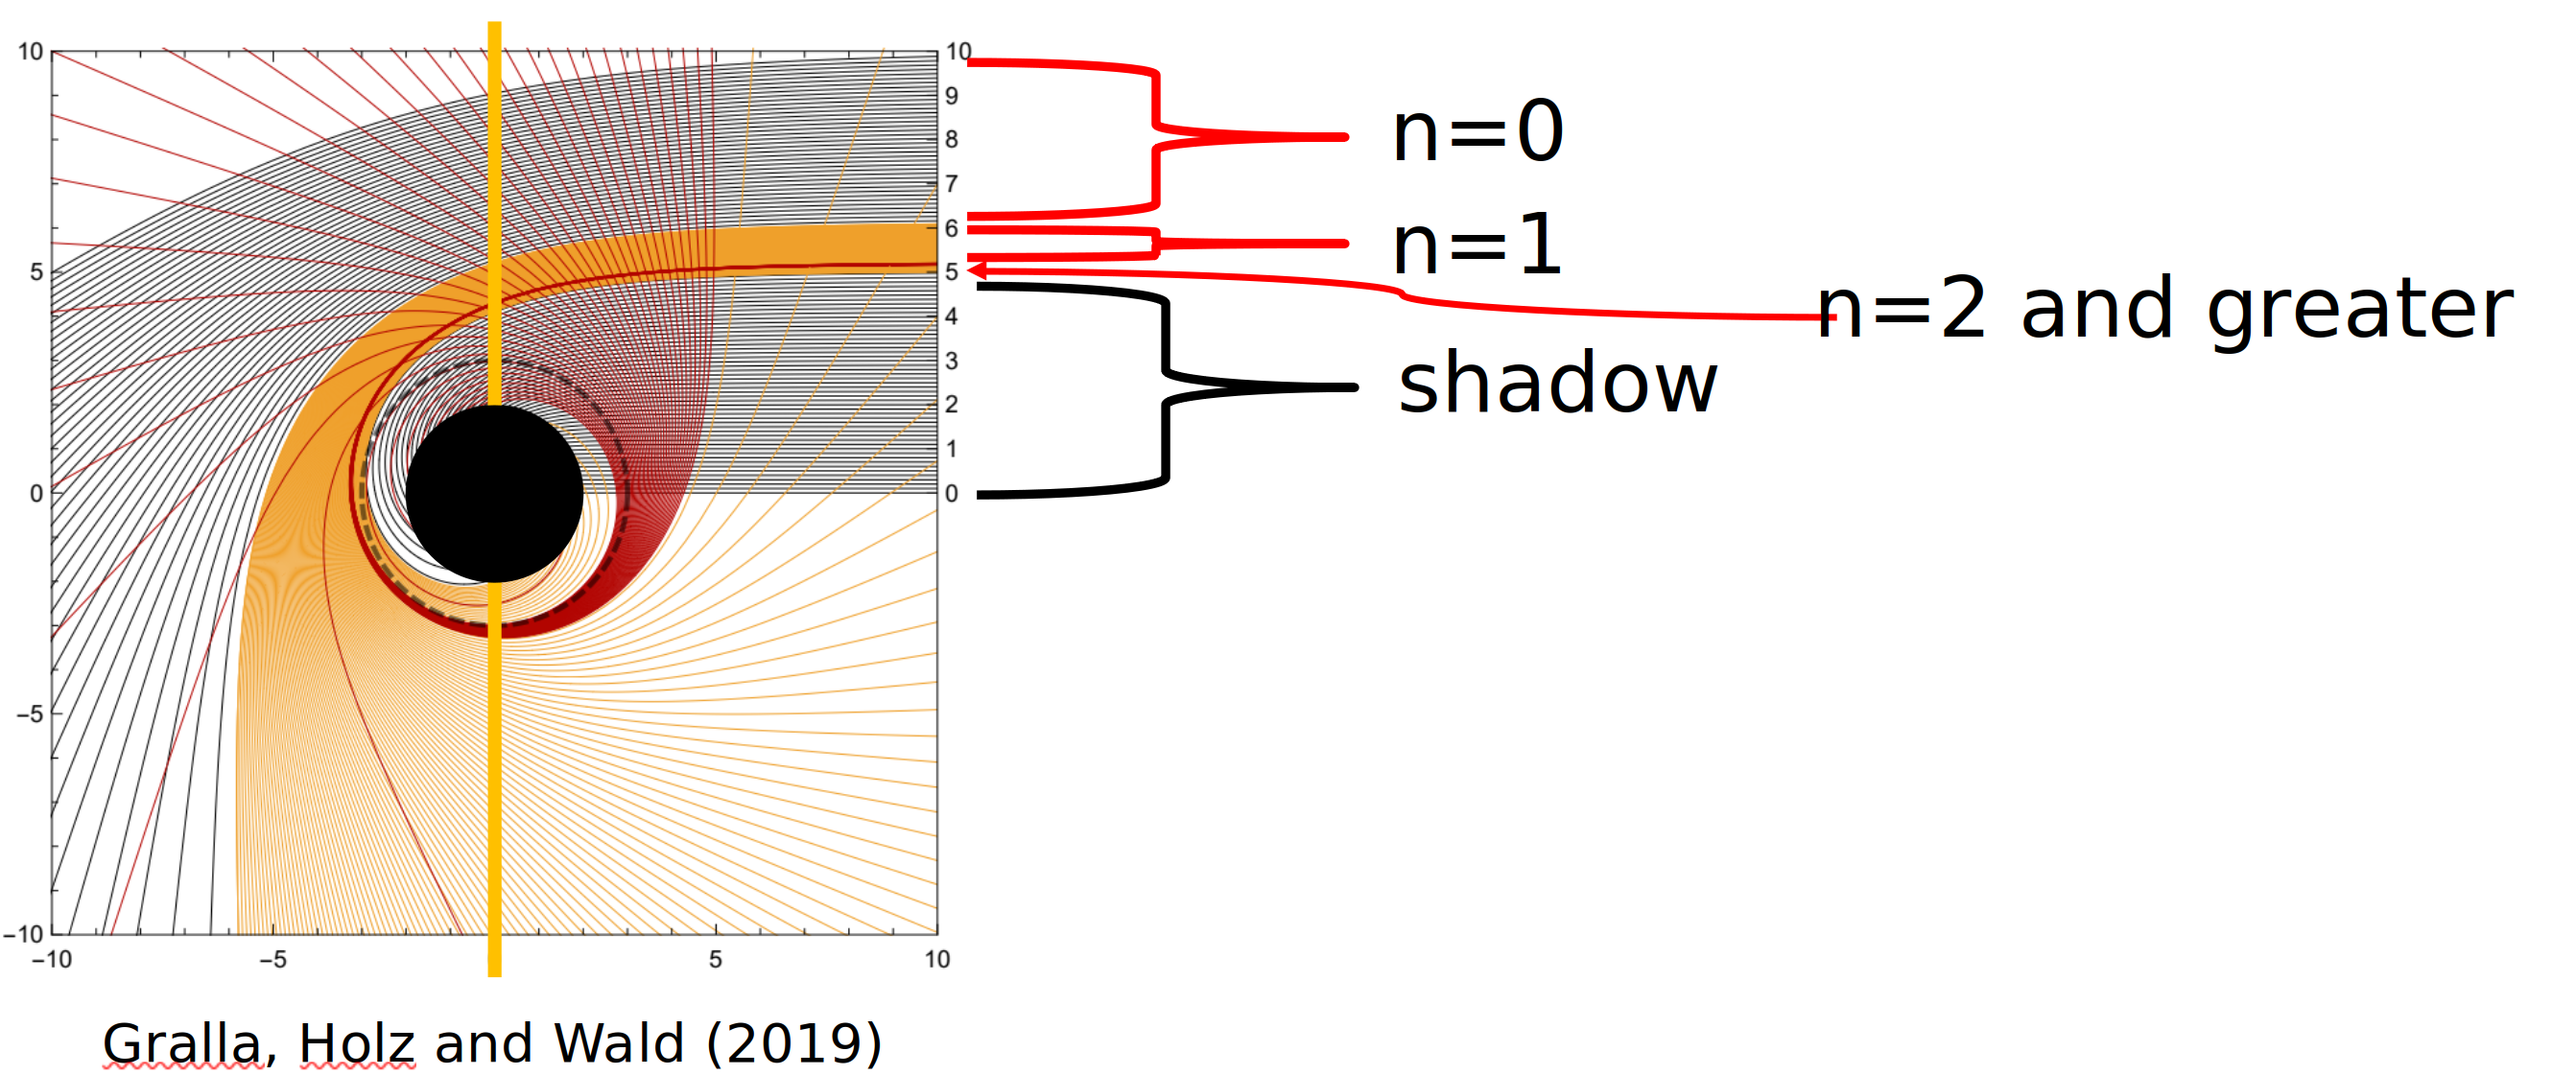

We will abuse spherical symmetry to draw our blackhole image. Spherical symmetry demands that trajectories lie within a plane. 

*Why is that?*


The important quantiies to consider are:

* $\psi$ to be the total winding angle of the photon as it travels from the source to the observer

* $\varphi$ as the screen angle


Finally, we will use the fact that if we know a trajectory in one plane (the equatorial plane that we calculated before), then we can get trajectories in other planes through rotation.

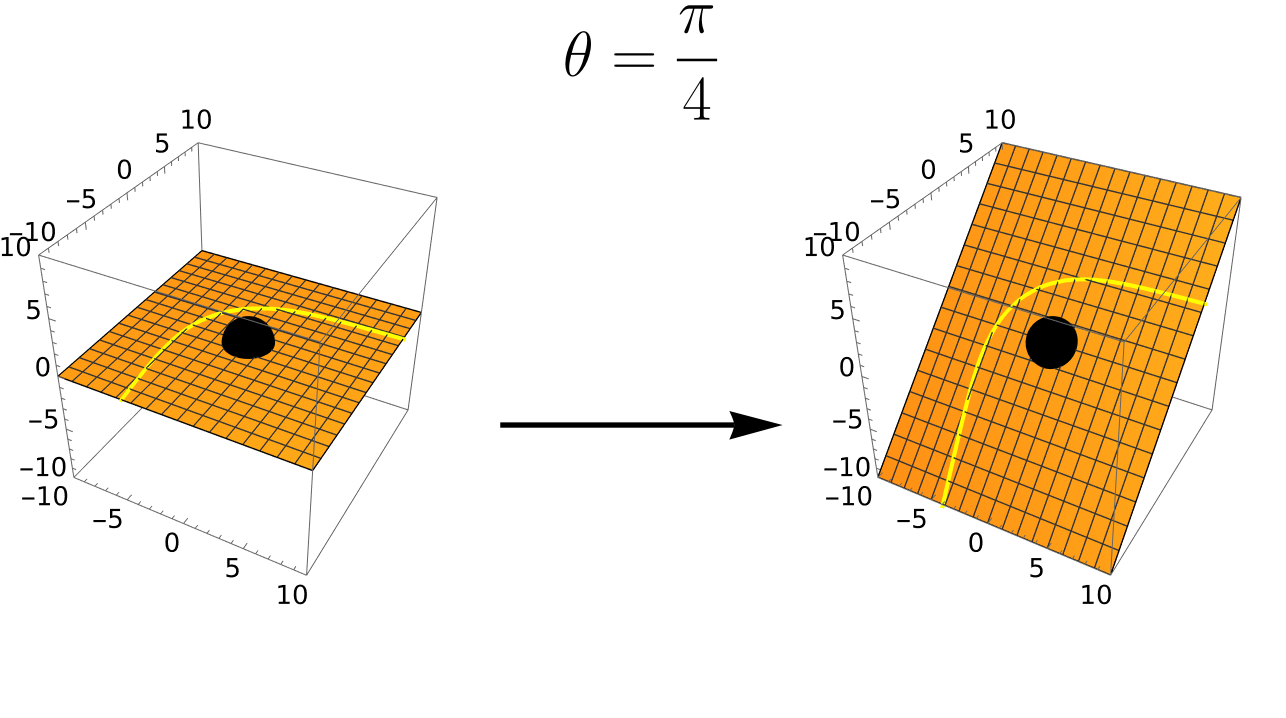

If we define the rotation matrices in the standard way, an observer lying along the $z$ axis of of the blackhole will find that,

$
\psi = \arccos(\sin(\theta_s)\sin(\phi_s))
$

$
\varphi = \arctan\left(\frac{\cos\phi_s}{\cos(\theta_s)^2\sin(\phi_s)}\right)
$


where the emitter is located at $(r_s,\theta_s,\phi_s)$

In [13]:
def psi(phi, theta):
  return np.arccos(np.sin(theta)*np.sin(phi))


def varphi(phi, theta):
  return np.arctan2(np.cos(phi), np.cos(theta)*np.sin(phi))

## Shadow

We noticed before that there was a bound orbit at $r=3$. This is the boundary between where geodesics change from infalling to scattering. We can therefore find the shadow by setting $r=3$, and solving for extrema in the radial potential. When doing so, you will find that the shadow is located at **$b^2=27$**.



In [14]:
radial_potential(3,np.sqrt(27))

0.0

Lets put everything together

Notice how the successive n's 'pile up' at around $b=\sqrt{27}$. This feature is the blackhole's photon ring.

In [ ]:
steps = 500
theta = 85*np.pi/180
rmin = 5
rmax = 25
rsteps = 5
bmax = np.sqrt(rs**3/ (rs-2))+1
phivals = np.linspace(0.0001*np.pi,2*np.pi*0.9999,num=steps)
varphivals = np.array([np.pi if phi >= np.pi else 0 for phi in phivals])+np.arccos(np.sign(np.pi-phivals)*np.cos(phivals)/np.sqrt(np.cos(phivals)**2 +np.sin(phivals)**2*np.cos(theta)**2))
psivals1 = np.array([psi(p, theta) for p in phivals])

#n = 0, 1 and 2
for n,col in reversed(list(enumerate(['b', 'g', 'r']))):
  bmin1 = 0
  bmin2 = 3
  if n > 0:
    bmin1 = 5
    bmin2 = 5
  psivals10 = n*np.pi + psivals1
  for rs in range(rmin, rmax, rsteps):
    psivals20 = np.array([[phi2((-1)**(n>0)*np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(bmin1, bmax, num=steps)])
    psivals30 = np.array([[phi2(-np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(bmin2, bmax, num=steps)])
    bvals = np.array([min([min(psivals20, key=lambda x:abs(x[0]-phi)), min(psivals30, key=lambda x:abs(x[0]-phi))], key=lambda x:abs(x[0]-phi))[1] for phi in psivals10])
    alphavals = (bvals) * np.cos(varphivals)
    betavals = -(bvals) * np.sin(varphivals)
    plt.plot(alphavals, betavals, col, zorder=2)

ax = plt.gca()   
ax.add_patch(plt.Circle((0, 0), np.sqrt(27), color='k', zorder=1))


ax.set_aspect(1)
plt.show()


/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/154827057.py:20: RuntimeWarning: invalid value encountered in sqrt
  psivals20 = np.array([[phi2((-1)**(n>0)*np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(bmin1, bmax, num=steps)])
/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/324942859.py:12: RuntimeWarning: invalid value encountered in scalar divide
  (x**2+rt) * np.sqrt(-((b**2*(-2+x**2+rt)) / (x**2+rt)) + (x**2+rt)**2)
/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/324942859.py:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(d_phi_dx, np.inf, xi, args=(b,rt))
/var/folders/69/qsgfh7hj7csg_x4f7kcm2p9r0000gq/T/ipykernel_36689/154827057.py:21: RuntimeWarning: invalid value encountered in sqrt
  psivals30 = np.array([[phi2(-np.sqrt(rs-minrs(b)), b)[0],b] for b in np.linspace(bmin2, bmax, num=steps